## 1. Example Performance Uploads with Noises

In [25]:
import numpy as np
X = [0.47355184638423353,0.4880126114596745,0.48197951076343787,0.4910955877995803,0.49148326528871633,0.4942378553333534,0.49584690352035904,0.4998314645835072,0.5052953918607438,0.5029510307609053]
A = np.array([X,[0]*len(X)])
sigma = 1.0
personal_noise = (sigma * np.random.randn(2)).reshape((2,1))
print(personal_noise)
B = A + personal_noise
C = B + 0.3 * np.random.randn(len(A),len(A[0]))

[[-0.71952388]
 [ 0.14721603]]


In [26]:
A.shape

(2, 10)

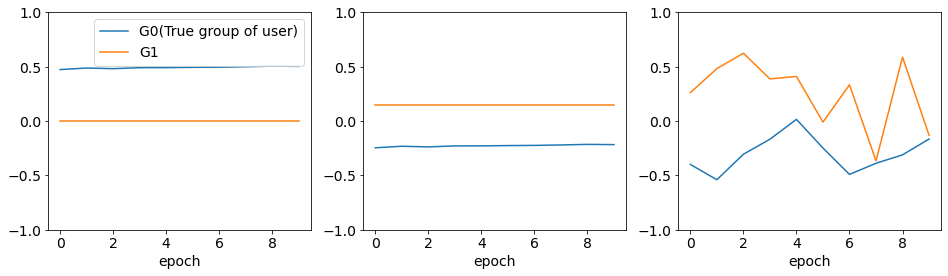

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14

plt.figure(figsize = (16, 4))
plt.subplot(1,3,1)
plt.plot(A.transpose())
plt.ylim(-1.0,1.0)
plt.xlabel('epoch')
plt.legend(['G0(True group of user)','G1'])
# plt.title('Original uploads')

plt.subplot(1,3,2)
plt.plot(B.transpose())
plt.ylim(-1.0,1.0)
plt.xlabel('epoch')
# plt.title('After adding personal noise')

plt.subplot(1,3,3)
plt.plot(C.transpose())
plt.ylim(-1.0,1.0)
plt.xlabel('epoch')
# plt.title('After adding epoch noise')
plt.show()

## Choosing Sigma

In [14]:
import numpy as np
from scipy.stats import norm
def get_lower_bound(X, delta_1):
    return X / (np.sqrt(2)*norm.ppf(0.5+delta_1))
def get_upper_bound(X_actual, H, N, delta_2):
    return H * X_actual * np.sqrt(N * delta_2)

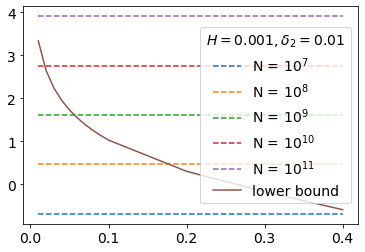

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
delta_list = [0.01*i for i in range(1,10)] + [0.1*i for i in range(1,5)]
H = 0.001
X_actual = 0.5
delta_2 = 0.1
plt.rcParams.update({'font.size': 14})
for p in range(7,12):
    plt.plot(delta_list, [np.log(get_upper_bound(X_actual, H, 10**p, delta_2))] * len(delta_list), '--', label = 'N = $10^{' + str(p) + '}$')
lbs = [np.log(get_lower_bound(1., delta_1)) for delta_1 in delta_list]
plt.plot(delta_list, lbs, label = 'lower bound')
plt.legend(title = r'$H=' + str(H) + ',\delta_2=0.01}$')
plt.show()

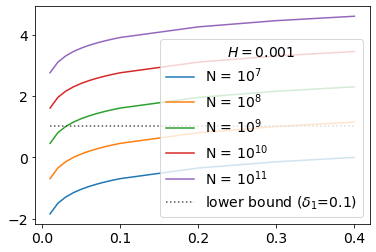

In [27]:
X_actual = 0.5
H = 0.001
delta_1 = 0.1
for p in range(7,12):
    N = 10**p
    ubs = [get_upper_bound(X_actual, H, N, delta_2) for delta_2 in delta_list]
    plt.plot(delta_list, np.log(ubs), label = 'N = $10^{' + str(p) + '}$')
plt.plot(delta_list, [np.log(get_lower_bound(1., 0.1))] * len(delta_list), ':', color = '#555555', label = r'lower bound ($\delta_1$=' + str(delta_1) + ')')
plt.legend(title = r'$H=' + str(H) + '$')
plt.show()

## 2. Group Differences during Training

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [26]:
from data.preprocess import ROOT
group_feature = 'activity'
best_setting = {'ml-1m': {'MF': [], 
                          'FedMF': [], 
                          'FairMF': [
                              f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda-0.7_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda-0.5_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda-0.3_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda-0.1_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda0.1_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda0.3_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda0.5_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda0.7_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00003_reg0.1_losspairwisebpr_lambda0.9_g{group_feature}.log'
                          ],
                          'F2MF': [
#                               f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.7_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.5_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.3_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.1_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.1_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.3_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.5_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.7_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.9_sigma0_g{group_feature}.log'
                              f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.7_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.5_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.3_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.1_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.1_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.3_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.5_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.7_sigma0.01_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.9_sigma0.01_g{group_feature}.log'
                          ]
                         },
               'amz_Movies_and_TV': {'MF': [], 
                          'FedMF': [], 
                          'FairMF': [
                              f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.7_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.5_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.3_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda-0.1_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.1_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.3_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.5_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.7_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairMF_lr0.00001_reg1.0_losspairwisebpr_lambda0.9_g{group_feature}.log'
                          ],
                          'F2MF': [
#                               f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.7_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.5_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.3_sigma0_g{group_feature}.log'
#                               f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.1_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.1_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.3_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.5_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.7_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.9_sigma0_g{group_feature}.log'
#                               ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.03_reg1.0_losspairwisebpr_lambda0.9_sigma0_g{group_feature}.log'
                              f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.5_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.3_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.1_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.1_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.3_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.5_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.7_sigma0.001_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.9_sigma0.001_g{group_feature}.log'
                          ]
                         }}

In [27]:
from utils import extract_args, extract_epochwise_result
import numpy as np
groups = []
# data_key = 'ml-1m'
data_key = 'amz_Movies_and_TV'
# data_key = 'amz_Books'
training_curves = {} # {fair_lambda: {group_feature: [values]}}
D = {} # {fair_lambda: {group_feature: [values]}}
for log_name in best_setting[data_key]['F2MF']:
    log_file_path = ROOT + data_key + log_name
    args = extract_args(log_file_path)
    observation_result = extract_epochwise_result(log_file_path, 'Previous statistics:')
    if len(groups) == 0:
        groups = [G for G in observation_result[0]]
    training_curves[args.fair_lambda] = {G: np.array([epoch_result[G] for epoch_result in observation_result])
                                         for G in groups}
    D_log = extract_epochwise_result(log_file_path, 'D:', next_line = False)
    D[args.fair_lambda] = {G: np.array([epoch_result[G] for epoch_result in D_log])
                                         for G in groups}
# print(training_curves)

/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.5_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.3_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda-0.1_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.1_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.3_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg1.0_losspairwisebpr_lambda0.5_sigma0.001_gactivity.log
/home/sl1471/workspace/experiments/amz_Movies_and_TV/logs/f2rec_tra

In [28]:
group_differences = {} # {fair_lambda: [value]}
for lbd, group_curves in training_curves.items():
    L = len(group_curves[groups[0]])
    diff_sum,diff_count = np.zeros(L),0.
    for i,G0 in enumerate(groups):
        curve0 = group_curves[G0]
        for G1 in groups[i+1:]:
            curve1 = group_curves[G1]
            diff_sum += np.abs(curve1 - curve0)
            diff_count += 1
    group_differences[lbd] = diff_sum / diff_count
print(group_differences)

{-0.5: array([0.00000000e+00, 5.86236039e-05, 7.73474085e-05, 6.89972424e-06,
       2.35194260e-04, 1.99417183e-04, 1.72640726e-04, 2.74492472e-04,
       2.09224672e-04, 2.55092850e-04, 2.27734548e-04, 3.17795208e-04,
       2.90771862e-04, 4.01161029e-04, 4.40303917e-04, 4.15329075e-04,
       2.99397369e-04, 3.63825752e-04, 2.94745528e-04, 3.59405633e-04]), -0.3: array([0.00000000e+00, 5.86236039e-05, 7.73474085e-05, 1.19843351e-05,
       2.35222551e-04, 1.94837109e-04, 1.64186895e-04, 2.61722760e-04,
       1.93035677e-04, 2.36227137e-04, 2.06242131e-04, 2.92950817e-04,
       2.64046845e-04, 3.70388838e-04, 4.09164565e-04, 3.81386606e-04,
       2.64087734e-04, 3.26247152e-04, 2.56125358e-04, 3.20185750e-04,
       3.26195555e-04, 3.43777230e-04, 3.89702737e-04, 5.18547606e-04,
       3.98791418e-04, 4.76567773e-04, 3.23481025e-04, 4.86160518e-04,
       5.40338164e-04, 5.90153085e-04, 4.68848884e-04, 6.05039019e-04,
       5.99088926e-04, 4.56278257e-04, 4.79609593e-04, 3.88566

In [29]:
# plot_stats = {f'lambda={lbd}': group_D for lbd, group_D in D.items()}
# title = 'ML1M(activity)'
# plot_stats[title] = group_differences
# print(plot_stats)

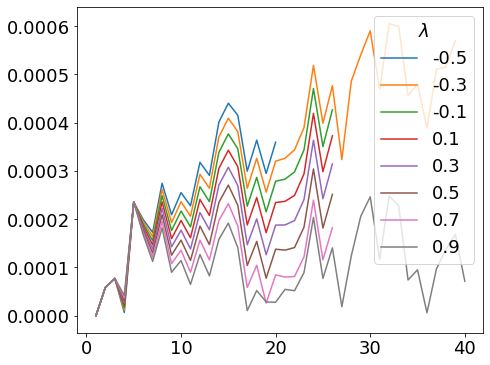

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils import plot_multiple_line
plt.rcParams.update({'font.size': 18})
data_name = {"ml-1m": 'ML1M', 'amz_Movies_and_TV': 'Movies', 'amz_Books': 'Books', 'amz_Electronics': 'Electronics'}
title = f'{data_name[data_key]}({group_feature})'
plot_multiple_line({'': group_differences}, [''], ncol = 2,
                   ylabel = '', xlabel = '', legend_title = '$\lambda$')

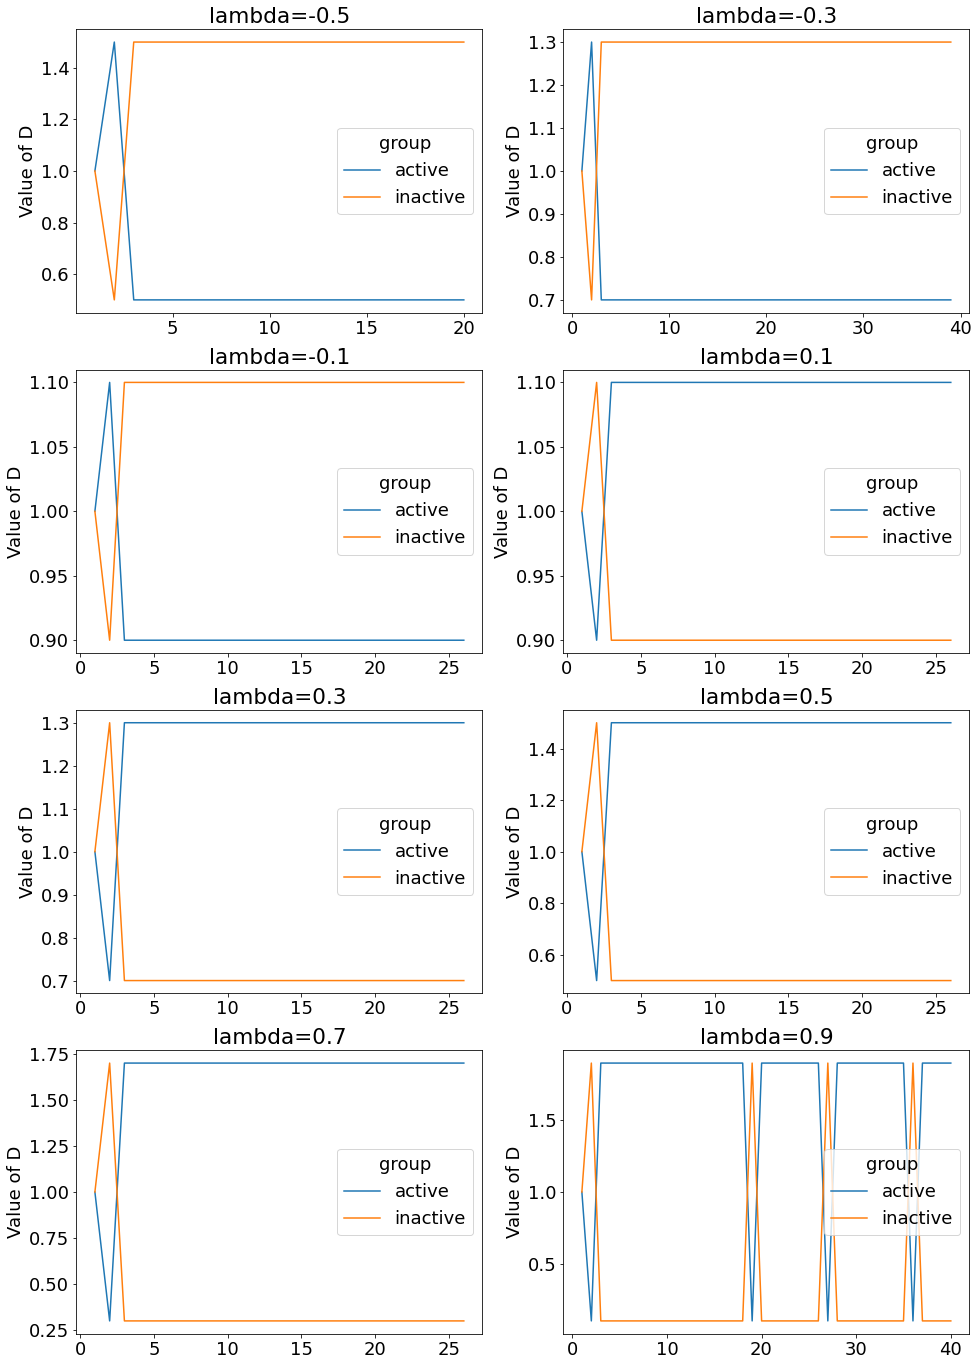

In [31]:
plt.rcParams.update({'font.size': 18})
title = 'ML1M(activity)'
plot_stats = {f'lambda={lbd}': group_D for lbd, group_D in D.items()}
plot_multiple_line(plot_stats, list(plot_stats.keys()), ncol = 2, row_height = 6,
                   ylabel = 'Value of D', xlabel = '', legend_title = 'group')

### 3. Dominance of Sigma

In [28]:
from data.preprocess import ROOT
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
group_feature = 'activity'
best_setting = {'ml-1m': {'F2MF': [
                              f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.7_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.5_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.3_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.1_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.1_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.3_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.5_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.7_sigma0_g{group_feature}.log'
                              ,f'/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.9_sigma0_g{group_feature}.log'
                          ]
                         },
               }

In [33]:
from utils import extract_args, extract_epochwise_result
import numpy as np
groups = ['active','inactive']
data_key = 'ml-1m'
sigma_curves = {} # {fair_sigma: {fair_lambda: [values]}}
for sigma in [0.0001,0.001,0.01]:
    aggregated_noise = {G:[np.random.randn() * sigma for i in range(100)] for G in groups}
    training_curves = {} # {fair_lambda: {group_feature: [values]}}
    for log_name in best_setting[data_key]['F2MF']:
        log_file_path = ROOT + data_key + log_name
        args = extract_args(log_file_path)
        observation_result = extract_epochwise_result(log_file_path, 'Previous statistics:')
        training_curves[args.fair_lambda] = {G: np.array([epoch_result[G] + aggregated_noise[G][i]
                                                          for i,epoch_result in enumerate(observation_result)])
                                             for G in groups}
    group_differences = {} # {fair_lambda: [values]}
    for lbd, group_curves in training_curves.items():
        L = len(group_curves[groups[0]])
        diff_sum,diff_count = np.zeros(L),0.
        for i,G0 in enumerate(groups):
            curve0 = group_curves[G0]
            for G1 in groups[i+1:]:
                curve1 = group_curves[G1]
                diff_sum += np.abs(curve1 - curve0)
                diff_count += 1
        group_differences[lbd] = diff_sum / diff_count
    sigma_curves[sigma] = group_differences

/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.7_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.5_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.3_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda-0.1_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.1_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.3_sigma0_gactivity.log
/home/sl1471/workspace/experiments/ml-1m/logs/f2rec_train_and_eval_FairFedMF_lr0.003_reg0.1_losspairwisebpr_lambda0.5_sigma0_gactivity.log
/home/sl1471/workspace/

In [34]:

def plot_multiple_line(stats, features, ncol = 2, row_height = 4, no_title = False,
                       ylabel = 'y', xlabel = 'x', legend_title = '', legend_appear_at = 0):
    '''
    @input:
    - stats: {field_name: {key: [values]}}
    - features: [field_name]
    - ncol: number of subplots in each row
    '''
    assert ncol > 0
    N = len(features)
    fig_height = 12 // ncol if len(features) == 1 else row_height*((N-1)//ncol+1)
    plt.figure(figsize = (16, fig_height))
    for i,field in enumerate(features):
        plt.subplot((N-1)//ncol+1,ncol,i+1)
        minY,maxY = float('inf'),float('-inf')
        for key, value_list in stats[field].items():
#             print(key, value_list)
            X = np.arange(1,len(value_list)+1)
            minY,maxY = min(minY,min(value_list)),max(maxY,max(value_list))
            plt.plot(X,value_list,label = key)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        if not no_title:
            plt.title(field)
        scale = 1e-4 + maxY - minY
        plt.ylim(minY - scale * 0.05, maxY + scale * 0.05)
        if i == legend_appear_at:
            plt.legend(title = legend_title)
    plt.show()

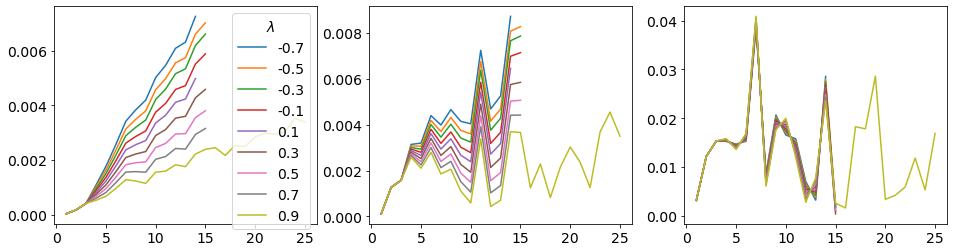

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
data_name = {"ml-1m": 'ML1M'}
plot_multiple_line(sigma_curves, list(sigma_curves.keys()), ncol = 3, no_title = True,
                   ylabel = '', xlabel = '', legend_title = '$\lambda$')